In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from utils.FrameUtils import FrameUtils

from sklearn.metrics import mean_squared_error, root_mean_squared_error

from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [2]:
df = pd.read_csv('data/delhi-weather-aqi-2025.csv')

df = FrameUtils.prepare_data_frame(df)

df = df.dropna()

In [32]:
df.head(3)

,date_ist,time_ist,location,lat,lon,temp_c,humidity,pressure_mb,windspeed_kph,condition_text,...,co,no2,hour,day_of_week,is_rush_hour,is_night,pm25_lag_1,pm25_lag_2,pm25_lag_3,pm25_lag_24
24,2025-01-01,4:00,Anand Vihar,28.6469,77.3160,7.3,100,993.8,6.8,Overcast,...,1372,20.6,4,2,0,1,153.2,156.5,153.2,185.8
25,2025-01-01,4:00,Connaught Place,28.6304,77.2177,7.6,98,992.4,5.9,Overcast,...,1379,20.6,4,2,0,1,149.5,153.2,156.5,185.8
26,2025-01-01,4:00,Dwarka,28.5882,77.0494,7.0,99,993.0,5.6,Overcast,...,1327,24.6,4,2,0,1,149.5,149.5,153.2,193.7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52536 entries, 24 to 52559
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date_ist        52536 non-null  datetime64[ns]
 1   time_ist        52536 non-null  object        
 2   location        52536 non-null  object        
 3   lat             52536 non-null  float64       
 4   lon             52536 non-null  float64       
 5   temp_c          52536 non-null  float64       
 6   humidity        52536 non-null  int64         
 7   pressure_mb     52536 non-null  float64       
 8   windspeed_kph   52536 non-null  float64       
 9   condition_text  52536 non-null  object        
 10  description     52536 non-null  object        
 11  aqi_index       52536 non-null  int64         
 12  pm2_5           52536 non-null  float64       
 13  pm10            52536 non-null  float64       
 14  co              52536 non-null  int64         
 15  no2   

In [5]:
df.describe()

,date_ist,lat,lon,temp_c,humidity,pressure_mb,windspeed_kph,aqi_index,pm2_5,pm10,co,no2,hour,day_of_week,is_rush_hour,is_night,pm25_lag_1,pm25_lag_2,pm25_lag_3,pm25_lag_24
count,52536,52536.000000,52536.000000,52536.000000,52536.000000,52536.000000,52536.00000,52536.000000,52536.000000,52536.000000,52536.000000,52536.000000,52536.000000,52536.000000,52536.000000,52536.000000,52536.000000,52536.000000,52536.000000,52536.000000
mean,2025-07-02 01:59:43.554134272,28.608850,77.174567,25.032347,62.268844,983.158246,6.56700,287.404751,89.504734,300.520083,863.529294,35.437569,11.504568,2.997716,0.375171,0.333029,89.504947,89.504913,89.505126,89.511918
min,2025-01-01 00:00:00,28.527300,77.049400,5.700000,5.000000,966.100000,0.00000,56.000000,6.000000,6.100000,146.000000,1.700000,0.000000,0.000000,0.000000,0.000000,6.000000,6.000000,6.000000,6.000000
25%,2025-04-02 00:00:00,28.556200,77.100000,19.500000,44.000000,977.500000,4.00000,152.000000,51.100000,80.600000,464.000000,14.900000,6.000000,1.000000,0.000000,0.000000,51.100000,51.100000,51.100000,51.100000
50%,2025-07-02 00:00:00,28.609300,77.160100,26.500000,65.000000,983.400000,6.00000,170.000000,76.400000,151.300000,664.000000,26.900000,12.000000,3.000000,0.000000,0.000000,76.400000,76.400000,76.400000,76.400000
75%,2025-10-01 00:00:00,28.646900,77.261800,30.500000,82.000000,988.900000,8.70000,238.000000,110.400000,325.000000,1077.000000,47.100000,18.000000,5.000000,1.000000,1.000000,110.400000,110.400000,110.400000,110.400000
max,2025-12-31 00:00:00,28.704100,77.316000,43.800000,100.000000,998.800000,27.10000,2742.000000,443.300000,3263.400000,7432.000000,220.100000,23.000000,6.000000,1.000000,1.000000,443.300000,443.300000,443.300000,443.300000
std,NaN,0.058927,0.096519,7.610898,23.446375,6.686896,3.47833,328.048946,55.347619,412.868341,600.792212,28.982815,6.920491,1.998304,0.484172,0.471301,55.347843,55.347801,55.348025,55.357676


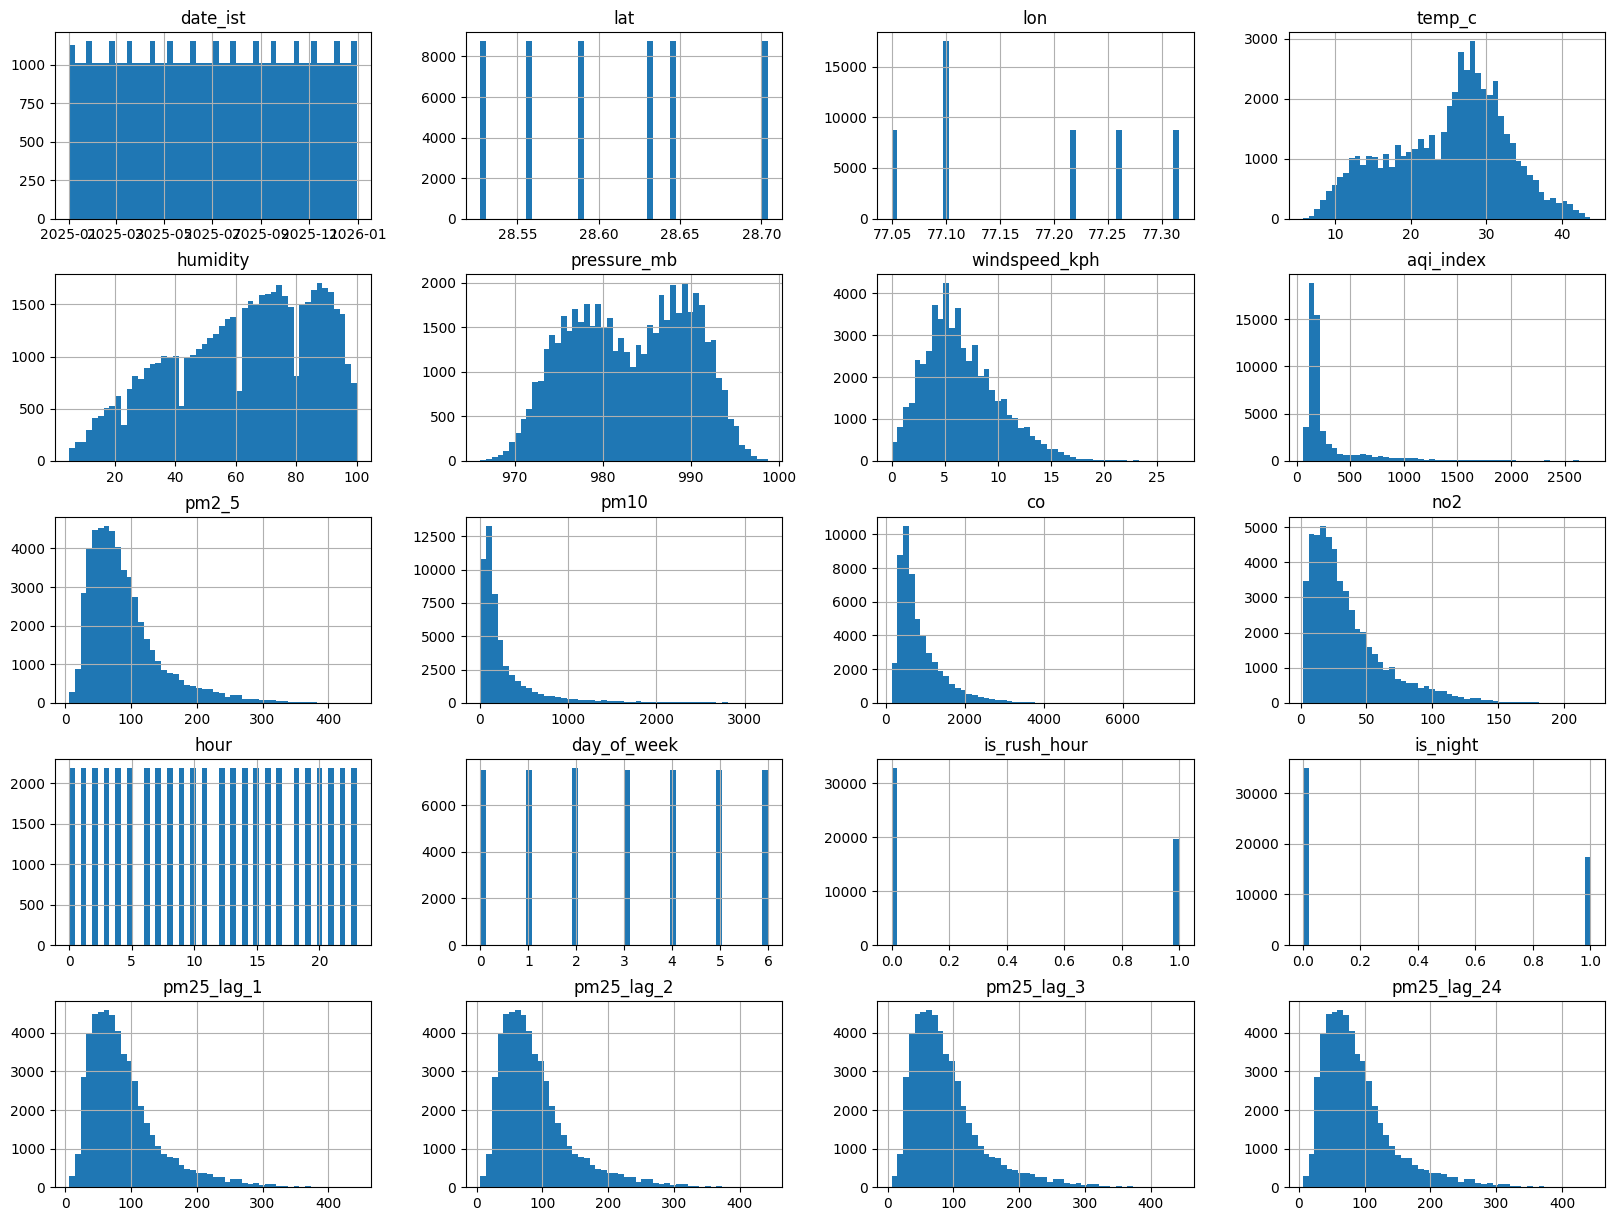

In [6]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [7]:
air_pollution = df.copy()

corr_matrix = air_pollution.corr(numeric_only=True)

corr_matrix["pm2_5"].sort_values(ascending=False)

pm2_5            1.000000
pm25_lag_3       0.884376
pm25_lag_24      0.792838
pm25_lag_1       0.790031
pm25_lag_2       0.787321
pm10             0.616015
aqi_index        0.525116
co               0.505623
no2              0.449590
pressure_mb      0.239526
is_night         0.121478
is_rush_hour     0.077620
day_of_week      0.047988
humidity         0.035415
hour            -0.015652
lon             -0.064801
windspeed_kph   -0.120391
lat             -0.146097
temp_c          -0.303927
Name: pm2_5, dtype: float64

In [8]:
air_pollution_labels = air_pollution['pm2_5'].copy()
air_pollution = FrameUtils.drop_columns(air_pollution)

In [9]:
strat_train_set, strat_test_set = train_test_split(air_pollution, test_size=0.2, random_state=69)

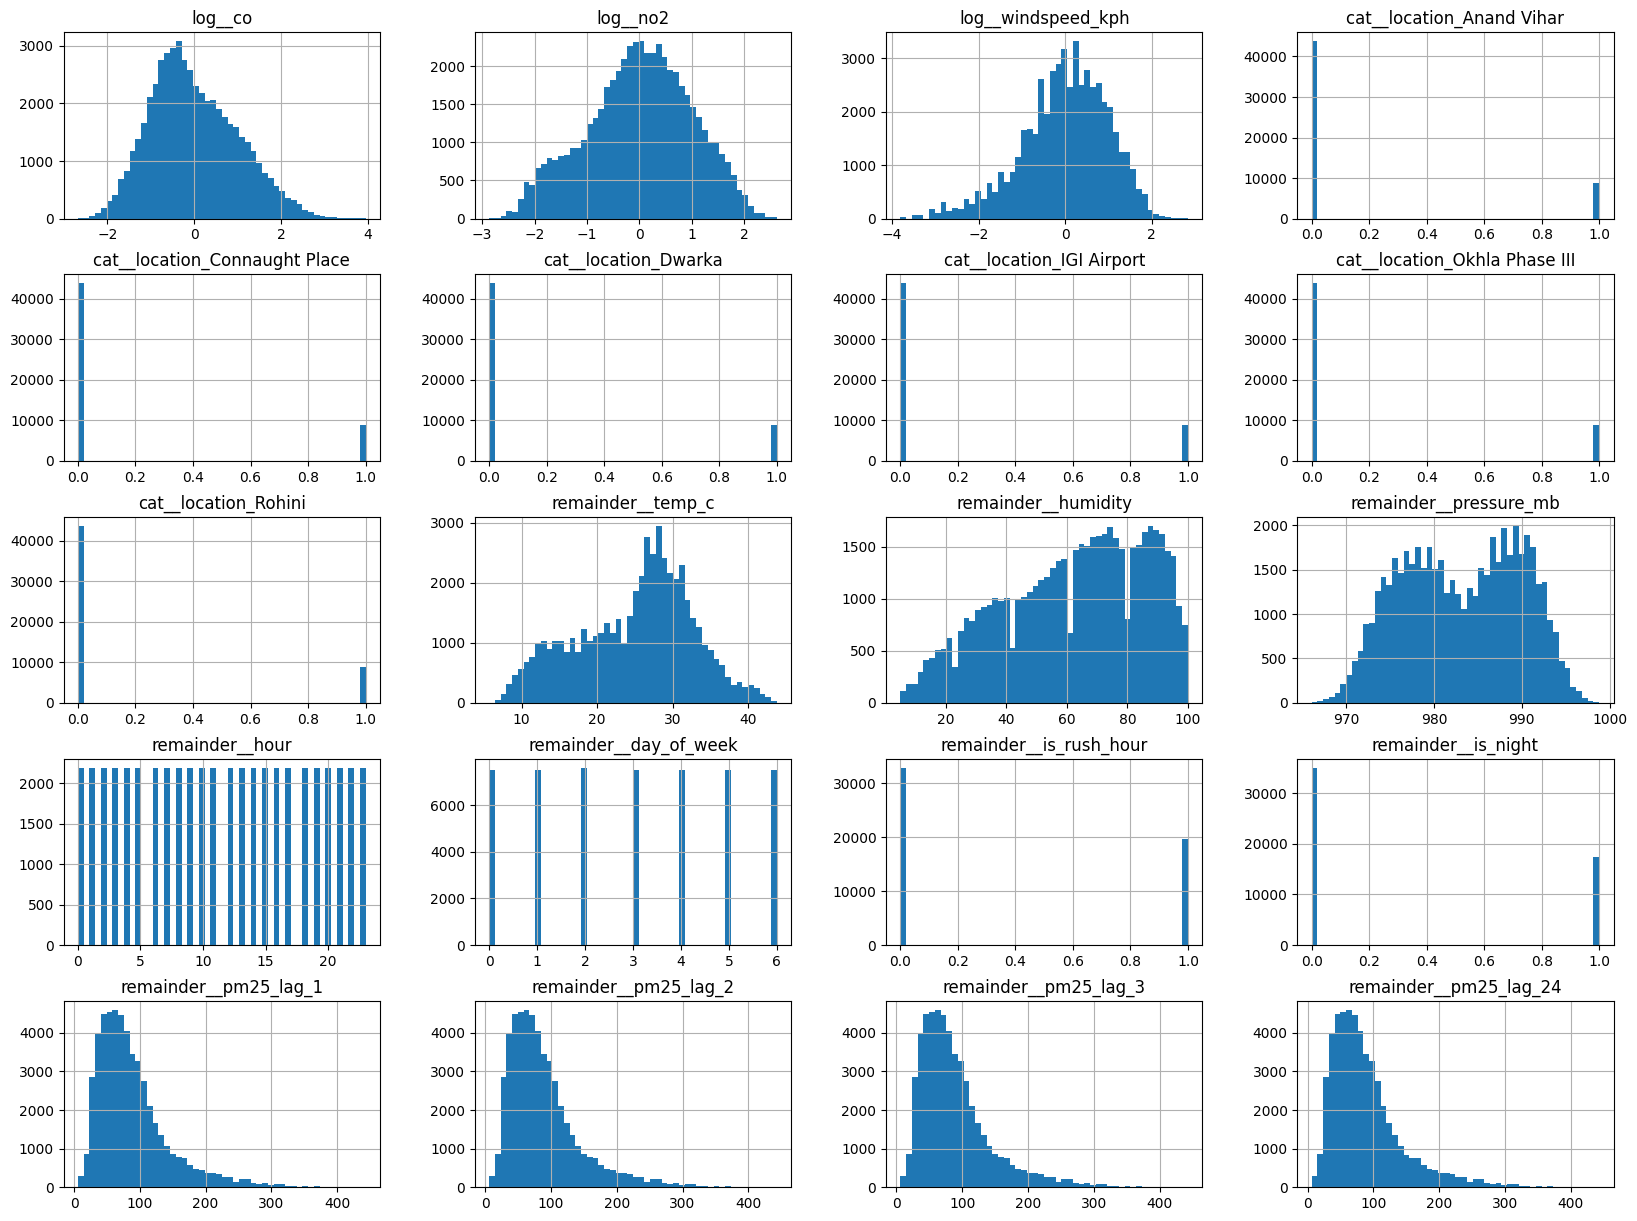

In [10]:
log_pipeline = make_pipeline(
    FunctionTransformer(np.log1p, feature_names_out="one-to-one"),
    StandardScaler()
)

preprocessing = ColumnTransformer([
    ("log", log_pipeline, ["co", "no2", "windspeed_kph"]),
    ("cat", OneHotEncoder(), ['location'])
], remainder="passthrough", )

prepared_air_pollution = preprocessing.fit_transform(air_pollution)

df_transformed = pd.DataFrame(
    prepared_air_pollution,
    columns=preprocessing.get_feature_names_out()
)

df_transformed.hist(bins=50, figsize=(20, 15))
plt.show()


In [13]:
tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=69))
tree_reg.fit(air_pollution, air_pollution_labels)

pollution_predictions = tree_reg.predict(air_pollution)

tree_rmse = mean_squared_error(air_pollution_labels, pollution_predictions)
tree_rmse

2.4115515111357757e-29

In [14]:
from sklearn.model_selection import cross_val_score

tree_rmses = -cross_val_score(tree_reg, air_pollution, air_pollution_labels, scoring="neg_root_mean_squared_error")

pd.Series(tree_rmses).describe()

count     5.000000
mean     11.746677
std       2.453408
min       8.400644
25%      10.984647
50%      12.045418
75%      12.077251
max      15.225425
dtype: float64

In [15]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=69))

forest_rmses = -cross_val_score(forest_reg, air_pollution, air_pollution_labels, scoring="neg_root_mean_squared_error")

pd.Series(forest_rmses).describe()


count     5.000000
mean      7.880539
std       2.069583
min       5.773901
25%       7.031089
50%       7.442935
75%       7.842001
max      11.312772
dtype: float64

In [16]:
full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=69, n_jobs=-1)),
])

param_grid = [
    {
        'random_forest__max_features': [8, 15, 30],
        'random_forest__n_estimators': [100, 200, 300],
        'random_forest__min_samples_leaf': [1, 2, 4, 8],
    },
]

grid_search = GridSearchCV(full_pipeline, param_grid, cv=5, scoring="neg_root_mean_squared_error")
grid_search.fit(air_pollution, air_pollution_labels)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...m_state=69))])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","[{'random_forest__max_features': [8, 15, ...], 'random_forest__min_samples_leaf': [1, 2, ...], 'random_forest__n_estimators': [100, 200, ...]}]"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'neg_root_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : t

In [17]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by=['mean_test_score'], ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_forest__max_features,param_random_forest__min_samples_leaf,param_random_forest__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
17,8.085782,0.164738,0.089313,0.004195,15,2,300,"{'random_forest__max_features': 15, 'random_fo...",-6.858994,-11.411286,-7.001492,-5.559059,-7.693379,-7.704842,1.977494,1
16,5.414806,0.112642,0.063740,0.000792,15,2,200,"{'random_forest__max_features': 15, 'random_fo...",-6.854475,-11.397229,-7.029196,-5.570524,-7.689141,-7.708113,1.968189,2
15,2.956006,0.125763,0.043977,0.001645,15,2,100,"{'random_forest__max_features': 15, 'random_fo...",-6.862901,-11.337012,-7.077247,-5.588342,-7.742414,-7.721583,1.937781,3
14,9.415641,0.420478,0.092482,0.005733,15,1,300,"{'random_forest__max_features': 15, 'random_fo...",-6.877161,-11.490062,-7.074190,-5.581488,-7.617222,-7.728025,1.996211,4
13,6.530789,0.299858,0.065759,0.001815,15,1,200,"{'random_forest__max_features': 15, 'random_fo...",-6.893375,-11.486870,-7.083204,-5.585403,-7.622644,-7.734299,1.992139,5


In [23]:
param_distribution = {
    'random_forest__max_features': [15],
    'random_forest__n_estimators': randint(low=300, high=1000),
    'random_forest__min_samples_leaf': [2],
}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribution, n_iter=3, cv=3, scoring="neg_root_mean_squared_error",
    random_state=69)

rnd_search.fit(air_pollution, air_pollution_labels)

,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...m_state=69))])
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'random_forest__max_features': [15], 'random_forest__min_samples_leaf': [2], 'random_forest__n_estimators': <scipy.stats....002194CB6ACC0>}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",3
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",'neg_root_mean_squared_error'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation str

In [24]:
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by=['mean_test_score'], ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_forest__max_features,param_random_forest__min_samples_leaf,param_random_forest__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1,10.047470,0.306736,0.159071,0.005553,15,2,503,"{'random_forest__max_features': 15, 'random_fo...",-9.217247,-8.667878,-6.380139,-8.088421,1.228583,1
2,19.139986,0.327643,0.297083,0.008675,15,2,919,"{'random_forest__max_features': 15, 'random_fo...",-9.219419,-8.661800,-6.384637,-8.088619,1.226213,2
0,7.349494,0.218925,0.125158,0.007001,15,2,354,"{'random_forest__max_features': 15, 'random_fo...",-9.236414,-8.678872,-6.370420,-8.095235,1.240686,3


In [25]:
final_model = grid_search.best_estimator_
feature_importances = final_model["random_forest"].feature_importances_

sorted(zip(feature_importances, final_model["preprocessing"].get_feature_names_out()), reverse=True)

[(np.float64(0.6383834994816635), 'remainder__pm25_lag_3'),
 (np.float64(0.1552025830473743), 'remainder__pm25_lag_1'),
 (np.float64(0.10791985218827015), 'remainder__pm25_lag_2'),
 (np.float64(0.027159188451775382), 'remainder__pm25_lag_24'),
 (np.float64(0.02303564611472433), 'cat__location_Anand Vihar'),
 (np.float64(0.016822530953307862), 'cat__location_Okhla Phase III'),
 (np.float64(0.0068909327734793455), 'cat__location_Rohini'),
 (np.float64(0.005162190524919131), 'log__no2'),
 (np.float64(0.00478704620480776), 'log__co'),
 (np.float64(0.003917126798718045), 'remainder__windspeed_kph'),
 (np.float64(0.001688187602799456), 'remainder__pressure_mb'),
 (np.float64(0.0016526304031938745), 'remainder__humidity'),
 (np.float64(0.0015545349990731196), 'remainder__temp_c'),
 (np.float64(0.001429213541981837), 'remainder__hour'),
 (np.float64(0.0013603957119015285), 'cat__location_Dwarka'),
 (np.float64(0.001305332615451377), 'cat__location_Connaught Place'),
 (np.float64(0.000921466087

3.527216328798688


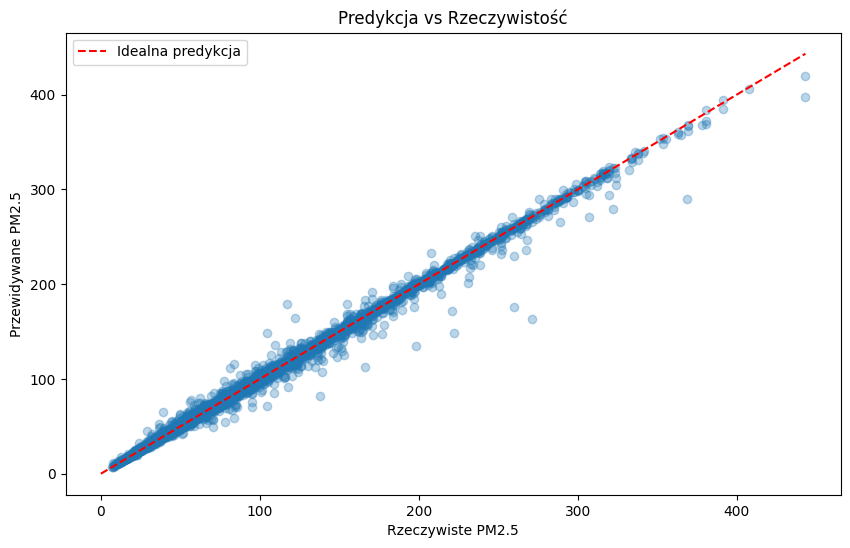

In [29]:
# X_test = strat_test_set.copy()
#
# y_test = strat_test_set['pm2_5'].copy()
#
# final_predictions = final_model.predict(X_test)
#
# final_rmse = root_mean_squared_error(final_predictions, y_test)

df = pd.read_csv('data/delhi-weather-aqi-2025.csv')
df = FrameUtils.prepare_data_frame(df)
df = df.dropna()

_, test_df = train_test_split(df, test_size=0.2, random_state=69)

X_test = FrameUtils.drop_columns(test_df)
y_test = test_df['pm2_5'].copy()

final_predictions = final_model.predict(X_test)
final_rmse = root_mean_squared_error(y_test, final_predictions)

print(final_rmse)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, final_predictions, alpha=0.3)
plt.plot([0, y_test.max()], [0, y_test.max()], 'r--', label='Idealna predykcja')
plt.xlabel('Rzeczywiste PM2.5')
plt.ylabel('Przewidywane PM2.5')
plt.title('Predykcja vs Rzeczywistość')
plt.legend()
plt.show()

In [30]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(
    stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([2.99760399, 3.98708921])

In [31]:
from sklearn.dummy import DummyRegressor

dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(air_pollution, air_pollution_labels)

dummy_predictions = dummy_regr.predict(air_pollution)

baseline_rmse = root_mean_squared_error(air_pollution_labels, dummy_predictions)
baseline_rmse

55.34709222463906